In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates= list(lats_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | karasjok
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | shilka
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | ahipara
Processing Record 11 of Set 1 | boyolangu
Processing Record 12 of Set 1 | tazovskiy
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | cockburn harbour
City not found. Skipping...
Processing Record 18 of Set 1 | yerbogachen
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | mataura
Processi

Processing Record 38 of Set 4 | ketchikan
Processing Record 39 of Set 4 | tevaitoa
Processing Record 40 of Set 4 | paamiut
Processing Record 41 of Set 4 | pafos
Processing Record 42 of Set 4 | hobyo
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | arman
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | gondanglegi
Processing Record 47 of Set 4 | gat
Processing Record 48 of Set 4 | abnub
Processing Record 49 of Set 4 | dikson
Processing Record 50 of Set 4 | cockburn town
Processing Record 1 of Set 5 | saint-francois
Processing Record 2 of Set 5 | yarada
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | port pirie
Processing Record 5 of Set 5 | zhangye
Processing Record 6 of Set 5 | bonthe
Processing Record 7 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 5 | cascais
Processing Record 9 of Set 5 | karoi
Processing Record 10 of Set 5 | tommot
Processing Record 11 of Set 5 | dongon
Proc

Processing Record 28 of Set 8 | aberdeen
Processing Record 29 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 30 of Set 8 | haines junction
Processing Record 31 of Set 8 | poum
Processing Record 32 of Set 8 | kushmurun
Processing Record 33 of Set 8 | chumikan
Processing Record 34 of Set 8 | tuymazy
Processing Record 35 of Set 8 | talcahuano
Processing Record 36 of Set 8 | tharrawaddy
City not found. Skipping...
Processing Record 37 of Set 8 | akdepe
Processing Record 38 of Set 8 | florence
Processing Record 39 of Set 8 | makushino
Processing Record 40 of Set 8 | jalakandapuram
Processing Record 41 of Set 8 | sao filipe
Processing Record 42 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 8 | saint george
Processing Record 44 of Set 8 | cacapava do sul
Processing Record 45 of Set 8 | santiago
Processing Record 46 of Set 8 | madona
Processing Record 47 of Set 8 | dunedin
Processing Record 48 of Set 8 | zhigansk
Processing Record 49 of S

Processing Record 14 of Set 12 | igarka
Processing Record 15 of Set 12 | kolimvari
City not found. Skipping...
Processing Record 16 of Set 12 | jaisalmer
Processing Record 17 of Set 12 | roald
Processing Record 18 of Set 12 | rocha
Processing Record 19 of Set 12 | araouane
Processing Record 20 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 21 of Set 12 | port-gentil
Processing Record 22 of Set 12 | nadym
Processing Record 23 of Set 12 | rosario
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | surskoye
Processing Record 26 of Set 12 | maceio
Processing Record 27 of Set 12 | rio hondo
Processing Record 28 of Set 12 | denpasar
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | uyuni
Processing Record 31 of Set 12 | prudy
Processing Record 32 of Set 12 | gabi
Processing Record 33 of Set 12 | kadnikov
Processing Record 34 of Set 12 | pedernales
Processing Record 35 of Set 12 | naliya
Processing Record 36 of Set 12 | t

In [8]:
# Tally the number of cities collected
len(city_data)

570

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,74.97,84,87,3.78,ID,2022-03-23 21:15:39
1,Karasjok,69.4719,25.5112,22.68,90,100,17.34,NO,2022-03-23 21:15:40
2,Jamestown,42.0970,-79.2353,46.71,50,100,13.80,US,2022-03-23 21:15:40
3,Khatanga,71.9667,102.5000,3.65,97,100,5.03,RU,2022-03-23 21:15:41
4,Nikolskoye,59.7035,30.7861,31.80,97,22,3.69,RU,2022-03-23 21:15:43


In [10]:
# Re-order the columns 
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2022-03-23 21:15:39,-3.8004,102.2655,74.97,84,87,3.78
1,Karasjok,NO,2022-03-23 21:15:40,69.4719,25.5112,22.68,90,100,17.34
2,Jamestown,US,2022-03-23 21:15:40,42.0970,-79.2353,46.71,50,100,13.80
3,Khatanga,RU,2022-03-23 21:15:41,71.9667,102.5000,3.65,97,100,5.03
4,Nikolskoye,RU,2022-03-23 21:15:43,59.7035,30.7861,31.80,97,22,3.69


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

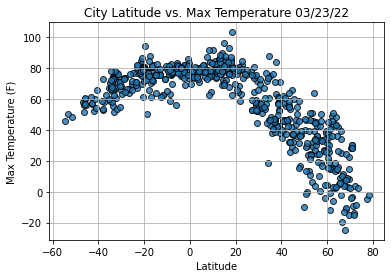

In [13]:
# Import the time module
import time

# # Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show scatter plt
plt.show()

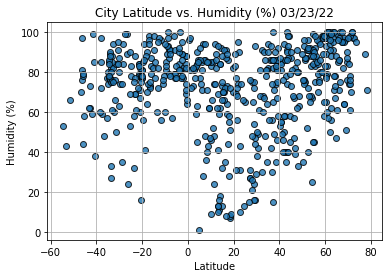

In [14]:
# Import the time module
import time

# # Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show scatter plt
plt.show()

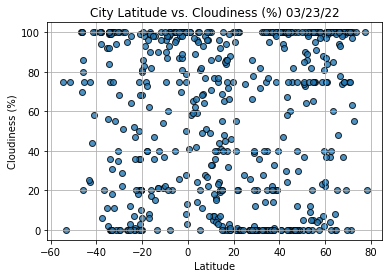

In [15]:
# Import the time module
import time

# # Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show scatter plt
plt.show()

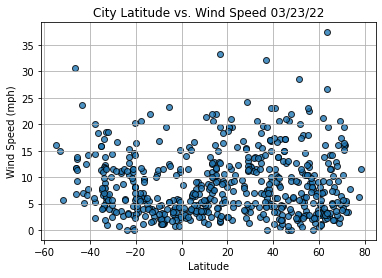

In [16]:
# Import the time module
import time

# # Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show scatter plt
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_vale, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-03-23 21:15:47
Lat                        -33.65
Lng                      115.3333
Max Temp                    55.33
Humidity                       82
Cloudiness                      0
Wind Speed                  12.37
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Karasjok,NO,2022-03-23 21:15:40,69.4719,25.5112,22.68,90,100,17.34
2,Jamestown,US,2022-03-23 21:15:40,42.0970,-79.2353,46.71,50,100,13.80
3,Khatanga,RU,2022-03-23 21:15:41,71.9667,102.5000,3.65,97,100,5.03
4,Nikolskoye,RU,2022-03-23 21:15:43,59.7035,30.7861,31.80,97,22,3.69
6,Shilka,RU,2022-03-23 21:15:44,51.8500,116.0333,13.44,91,86,1.14


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

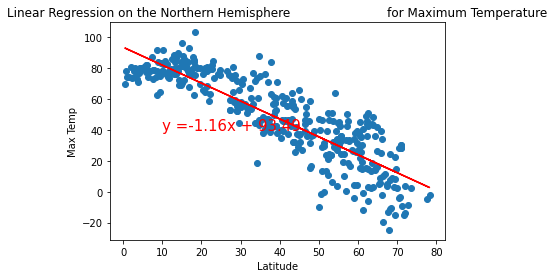

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

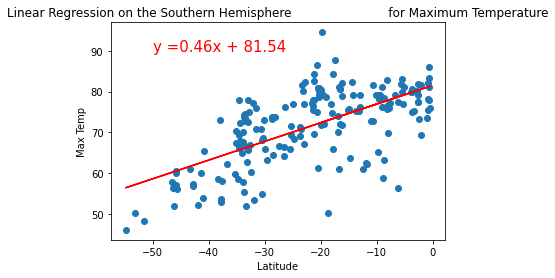

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

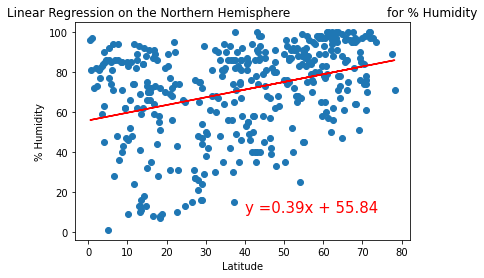

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

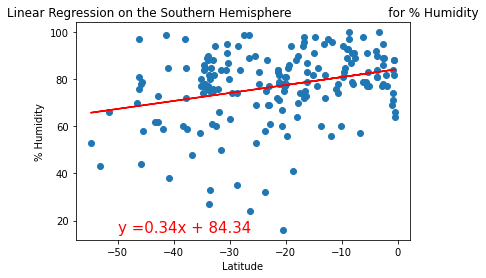

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

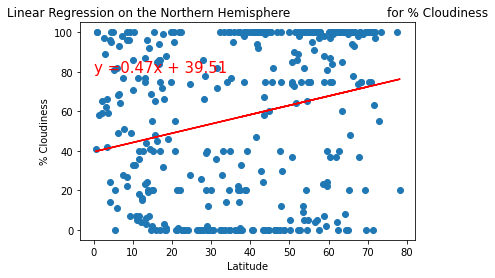

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,80))

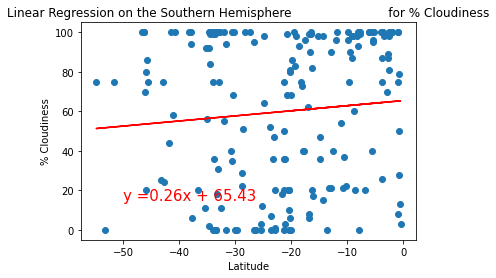

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

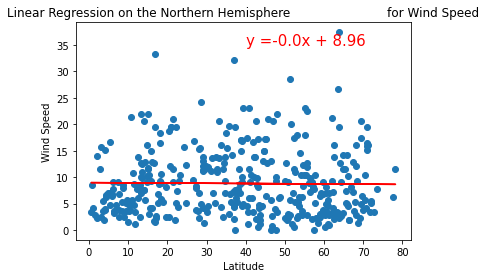

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

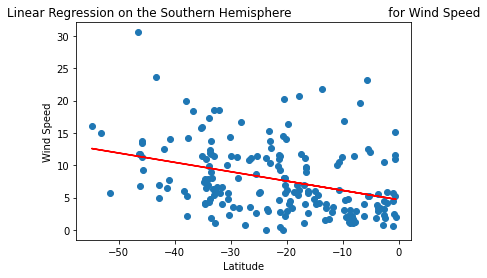

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))